# Regression with SKlearn - Predict Diamonds Prices

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seabornInstance
%matplotlib inline

df = pd.read_csv('C:\\Projects\\DataSets\\Diamonds\\Diamonds.csv', index_col=0)

## Initial Data Analysis

In [2]:
print('Size: ',df.shape)
print('Variables: ',list(df.columns))
print('Data Types: ',df.dtypes)
print(df.isnull().sum())
df.head()

Size:  (53940, 10)
Variables:  ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']
Data Types:  carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Linear Regression - Predict Price by Carat

## Dependent Variable analysis - Price

In [3]:
df['price'].agg(['max','mean','median','min'])

max       18823.000000
mean       3932.799722
median     2401.000000
min         326.000000
Name: price, dtype: float64

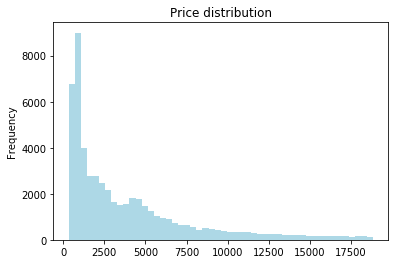

In [4]:
df['price'].plot(kind='hist', bins=50, color='lightblue', title='Price distribution')

Correlation between carat and price - positive

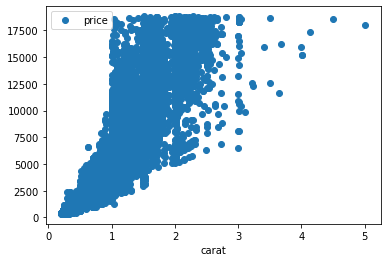

In [9]:
df.plot(x='carat',y='price', style='o')

## Prediction model

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Defining variabels:

In [11]:
X = df['carat'].values.reshape(-1,1) # Independed Variable - Input
y = df['price'].values.reshape(-1,1) # Depended Variable - Output

Splitting data into training & tests sets:

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor fitting:

In [13]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Predicting:

In [14]:
y_pred = regressor.predict(X_test)

Analayzing Model results:

R-Squared:  0.8515758113126248
Coefficient:  7745.256582433882
Intercept:  -2248.460057551038


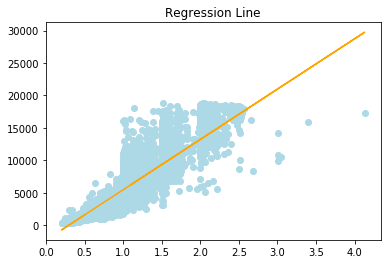

In [16]:
print('R-Squared: ', metrics.r2_score(y_test,y_pred))
print('Coefficient: ',regressor.coef_[0][0])
print('Intercept: ',regressor.intercept_[0])
plt.scatter(X_test,y_test, color='lightblue')
plt.plot(X_test,y_pred, color='orange')
plt.title('Regression Line')
plt.show()

## Multiple Linear Regression - Hyperplane

## Convert categorical variable into Ordinal variable - cut

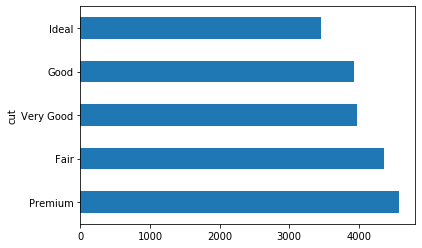

In [46]:
df.groupby('cut').mean()['price'].sort_values(ascending=False).plot(kind='barh')

In [47]:
list(df['cut'].unique())

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']

In [48]:
df['cut'].replace({'Ideal': 5, 'Premium': 4, 'Good': 3, 'Very Good': 2, 'Fair':1}, inplace=True)

Correlation table

In [49]:
df['size'] = df['x']*df['y']*df['z']

In [50]:
df[['carat','cut','depth','x','y','z','size','price']].corr()

,carat,cut,depth,x,y,z,size,price
carat,1.000000,-0.114426,0.028224,0.975094,0.951722,0.953387,0.976308,0.921591
cut,-0.114426,1.000000,-0.169916,-0.105361,-0.105319,-0.126726,-0.101119,-0.049421
depth,0.028224,-0.169916,1.000000,-0.025289,-0.029341,0.094924,0.009157,-0.010647
x,0.975094,-0.105361,-0.025289,1.000000,0.974701,0.970772,0.956564,0.884435
y,0.951722,-0.105319,-0.029341,0.974701,1.000000,0.952006,0.975143,0.865421
z,0.953387,-0.126726,0.094924,0.970772,0.952006,1.000000,0.950065,0.861249
size,0.976308,-0.101119,0.009157,0.956564,0.975143,0.950065,1.000000,0.902385
price,0.921591,-0.049421,-0.010647,0.884435,0.865421,0.861249,0.902385,1.000000


Defining Variables based on the correlations:

In [58]:
X = df[['cut','carat','size','x','y','z']].values
y = df['price'].values

Splitting into training & test sets:

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

Fitting Regressor:

In [60]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Coefficient:

In [61]:
v_def = df[['cut','carat','size','x','y','z']]
coeff_df = pd.DataFrame(regressor.coef_,v_def.columns)
coeff_df

,0
cut,170.735240
carat,8418.080310
size,13.083272
x,-154.892973
y,-601.625678
z,-701.238426


Predicting:

In [62]:
y_pred = regressor.predict(X_test)

Analayzing Results (slightly higher):

In [63]:
print('R-Squared: ', metrics.r2_score(y_test,y_pred))

R-Squared:  0.8607280804681006
